#Feature Engineering

##Importing Titanic Dataset

*   Survived: 0 = No, 1 = Yes
*   Pclass: Ticket class	1 = 1st, 2 2nd, 3 = 3rd
*   Sex:	Sex
* Age	Age in years
* Sibsp:	# of siblings / spouses aboard the Titanic
* Parch:	# of parents / children aboard the Titanic
* Ticket:	Ticket number
* Fare: Passenger fare
* Cabin: Cabin number
* Embarked: Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton







In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##Data PreProcessing (Refer to Day2_Data_PreProcessing.ipynb to understand steps taken)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']]).flatten()
df = df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])
imputer = SimpleImputer(strategy='most_frequent')
df['Embarked'] = imputer.fit_transform(df[['Embarked']]).flatten()
encoder = OneHotEncoder(sparse=False)
enc = encoder.fit_transform(df[['Embarked']])
df_encoded = pd.DataFrame(enc, columns=encoder.categories_[0])
df = pd.concat([df, df_encoded], axis=1)
df = df.drop(columns=['Embarked'])
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.000000,1,0,7.2500,0.0,0.0,1.0
1,1,1,0,38.000000,1,0,71.2833,1.0,0.0,0.0
2,1,3,0,26.000000,0,0,7.9250,0.0,0.0,1.0
3,1,1,0,35.000000,1,0,53.1000,0.0,0.0,1.0
4,0,3,1,35.000000,0,0,8.0500,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0.0,0.0,1.0
887,1,1,0,19.000000,0,0,30.0000,0.0,0.0,1.0
888,0,3,0,29.699118,1,2,23.4500,0.0,0.0,1.0
889,1,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   C         891 non-null    float64
 8   Q         891 non-null    float64
 9   S         891 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 69.7 KB


In [ ]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.188552,0.086420,0.725028
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.391372,0.281141,0.446751
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


##Feature Selection


Previously, we generated a pearson correlation heatmap and used our own analytical reasoning to decide which features to train our model on. However, that can often be impractical to apply to real world scenarios especially when handling big data. So we have various feature selection methods that can be classified into 2 main categories:
1.   **Filter** : Filter methods include statistical tests to check correlation between two features. They are often less computationally expensive than wrapper methods. Filter methods work amazing when a dataset's features have a linear relation.
2.   **Wrapper** : Wrapper methods include a trial and error approach to find which features are expensive i.e they train various models using different features and test their accuracy against the test split. They are often computationally expensive but work well with a dataset in which features have a non-linear relationship.

###Filter Methods

####1) Correlation Coefficient (Confirm if you need to split into a train and test dataset here)


The heatmap we generated in Day2_Data_Pre-Processing.ipynb was also based on the Pearson Correlation Coefficient but now we will take a more insightful approach to it using statistics and the nature of this method to make a more educated decision. Pearson Coefficient is used to select features via process of elimination. It is used to check which two independent variables are linearly correlated (threshold of correlation to decide whether one of the variables qualidfies to be eliminated is to be decided by us) so that one of them may be removed in order to reduce number of features in the dataset and as a result improve accuracy and decrease model training time since both the features show a same trend and, in theory, have  similar affect on the target variable. Additionally, since pearson correlation is calculating how correlated two variables are, we can also use it to visualize and understand the impact of an independent variable on a target variable given that the variables whose pearson correlation coefficient is being calculated satisfy the following conditions:
1. Features are continuous
2. Features are normally distributed
3. Features have the same variance

Note: Understand scaling from Sir Rawaha, mainly purpose and uses and applications and theory in order to use it better

#####1) Continuous Features
By looking at the plots below we can see that:
* Features that are Continuous (To be continous a feature needs to be able to take infinite values within a range): Fare, Age

Hence remaining features need not be considered ahead

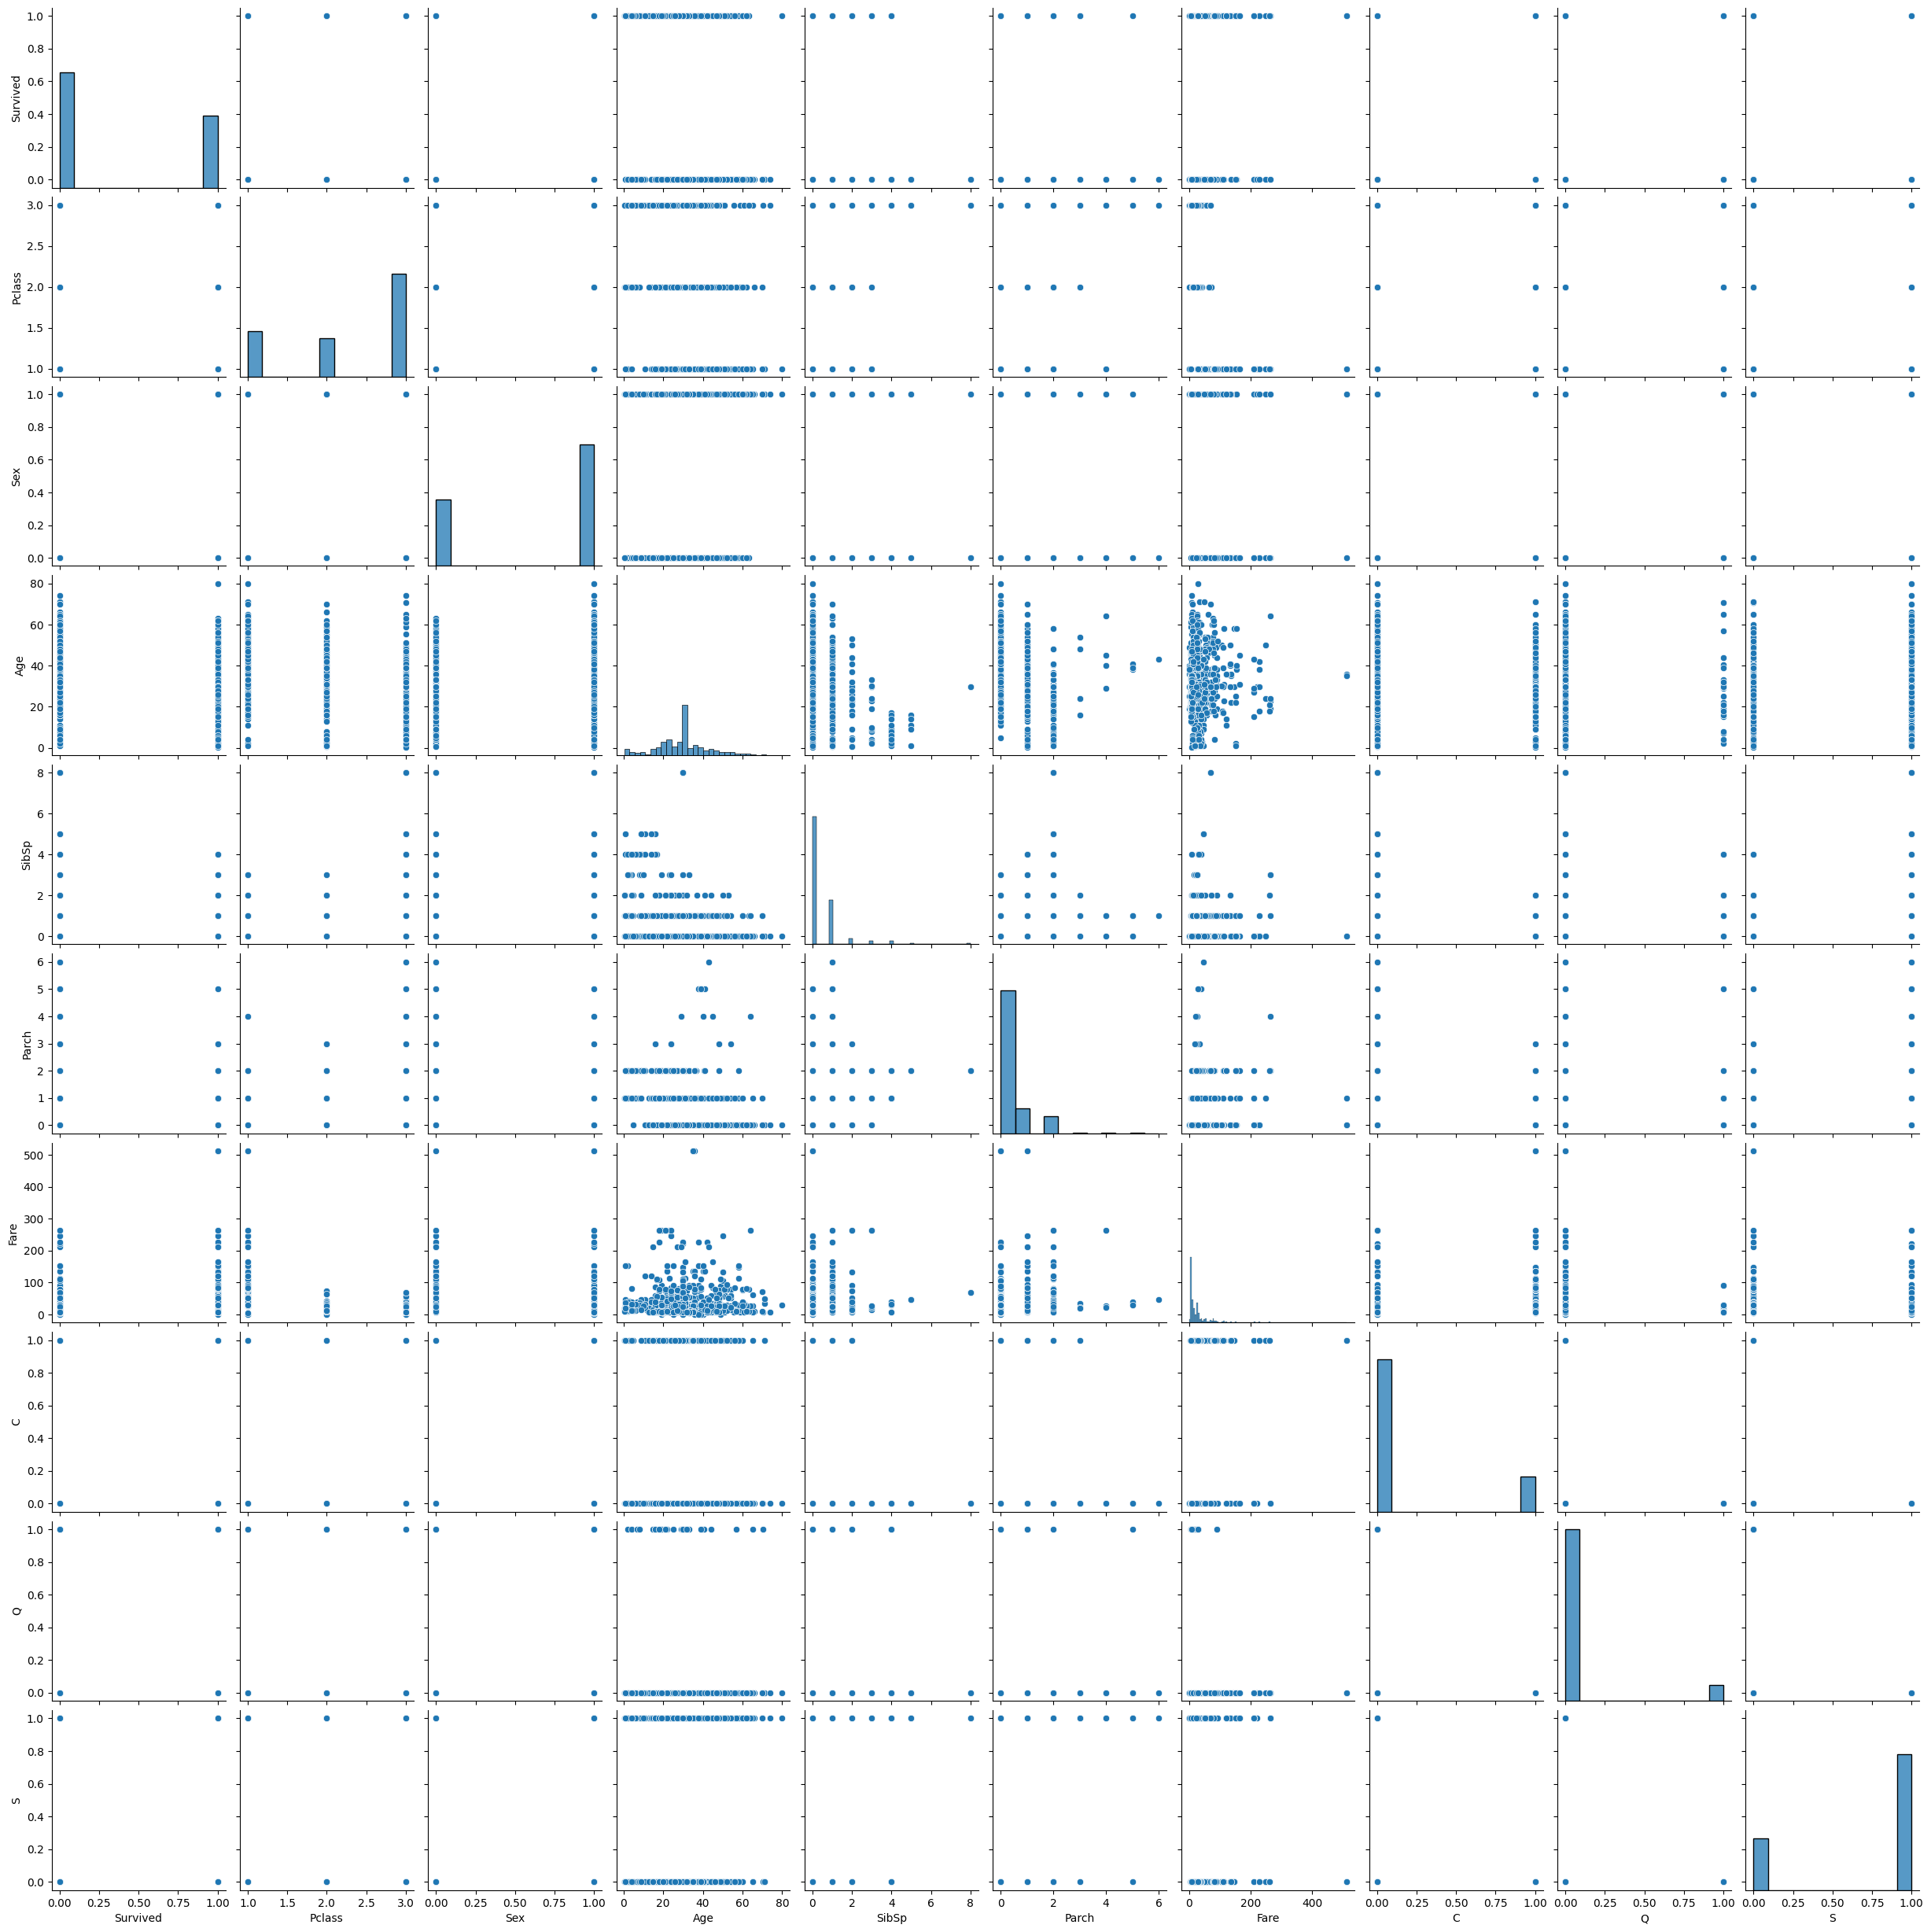

In [ ]:
sns.pairplot(df)

#####2) Normally Distriuted Features
By looking at the plots below we can see that:
* Features that are Normally Distributed (It need not be a perfectly normally distributed graph): Fare, Age

Note:Understand how normal distribution affects our answer here and if a general normally distributed trend is as acceptable as a perfectly normally distributed graph

<ipython-input-30-70b4b4beb1b5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

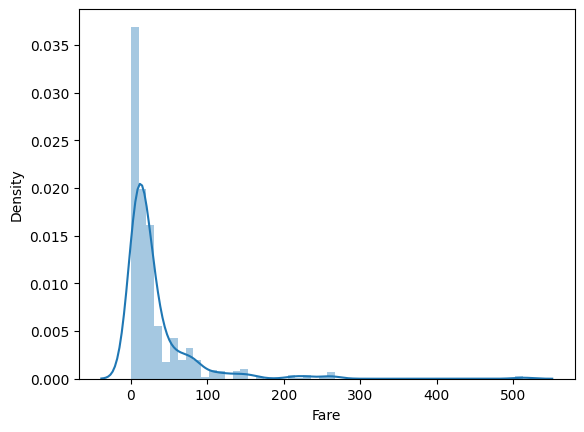

In [ ]:
sns.distplot(df['Fare'])

<ipython-input-31-0fafe04ea3f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

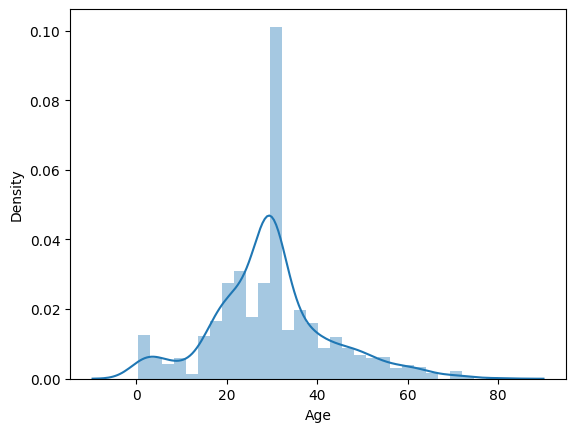

In [ ]:
sns.distplot(df['Age'])

#####3) Variance of Features
By looking at the plots below we can see that:
* Features that have similar variance (It need not be a exactly similar, we just need ballpark similar values): Fare, Age

Normalize the fare and age, calculate variances and compare resulting values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print('Fare Variance : ', np.std(scaler.fit_transform(np.array(df['Fare']).reshape(-1,1))))
print('Age Variance : ', np.std(scaler.fit_transform(np.array(df['Age']).reshape(-1,1))))

Fare Variance :  0.0969406671428724
Age Variance :  0.16329123991943995


#####Now that we have all 3 conditions satisfied, lets plot the graph to ensure we have no outliers and then calculate the pearson coefficient, and the p-value for fare and age.
Confirm plot accuracy and method

Plotting shows 2 outliers so lets use Z-score to eliminate outliers and then calculate pearson coefficient and p_value

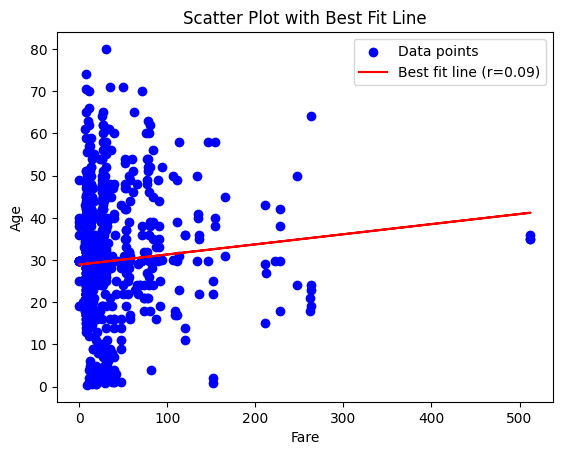

In [ ]:
from scipy import stats

plt.scatter(df['Fare'], df['Age'], color='blue', label='Data points')

# Calculate the best fit line
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Fare'], df['Age'])
line = slope * df['Fare'] + intercept

# Plot the best fit line
plt.plot(df['Fare'], line, color='red', label=f'Best fit line (r={r_value:.2f})')

# Add titles and labels
plt.title('Scatter Plot with Best Fit Line')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.legend()

# Show plot
plt.show()

Hypothesis:
* H0: Features are independent if p_value>0.05
* H1: Features are dependent if p_value<0.05

The features do seem to be dependent based on the p_value calculated but the pearson coefficient is too low for us to remove either of these features

Pearson correlation coefficient: 0.13081756499433048
P-value: 0.00011513902187415919


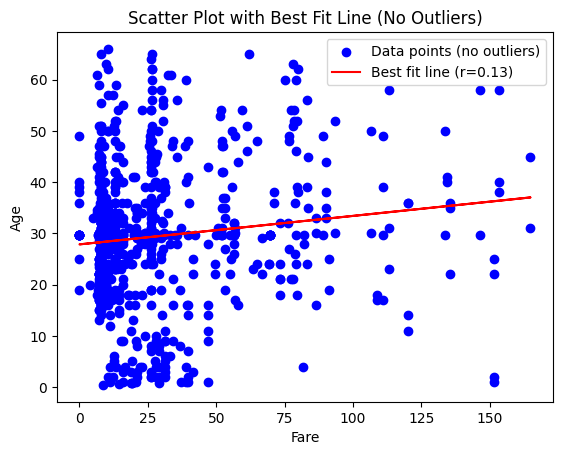

In [ ]:
# Example data with outliers
X = df['Fare']
Y = df['Age']

# Function to identify and remove outliers using Z-score method
def remove_outliers_zscore(X, Y, threshold=3):
    z_scores_X = np.abs(stats.zscore(X))
    z_scores_Y = np.abs(stats.zscore(Y))
    mask = (z_scores_X < threshold) & (z_scores_Y < threshold)
    return X[mask], Y[mask]

# Remove outliers
X_clean, Y_clean = remove_outliers_zscore(X, Y)

r, p_value = stats.pearsonr(X_clean, Y_clean)
print(f"Pearson correlation coefficient: {r}")
print(f"P-value: {p_value}")

# Scatter plot without outliers
plt.scatter(X_clean, Y_clean, color='blue', label='Data points (no outliers)')

# Calculate the best fit line without outliers
slope, intercept, r_value, p_value, std_err = stats.linregress(X_clean, Y_clean)
line = slope * X_clean + intercept

# Plot the best fit line
plt.plot(X_clean, line, color='red', label=f'Best fit line (r={r:.2f})')

# Add titles and labels
plt.title('Scatter Plot with Best Fit Line (No Outliers)')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.legend()

# Show plot
plt.show()

####2) Chi^2 Test



1. Frequency of each value is greater than 5
2. Categorical values whose values represent only a unique identity of each variable and not a ranking relative to other variables

Looking at the follwing output we can determine which features do not match our requirements for a chi^2 test. The following features do not meet our requirements:
1. Age: Continuous
2. Fare: Continuous
3. Parch : Frequency of some values is less than or equal to 5

In [ ]:
for col in df.columns:
  print()
  print(col, 'Value Counts', df[col].value_counts())
  print(col, 'Unique Values', sorted(df[col].unique()))
  print()


Survived Value Counts Survived
0    549
1    342
Name: count, dtype: int64
Survived Unique Values [0, 1]


Pclass Value Counts Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Pclass Unique Values [1, 2, 3]


Sex Value Counts Sex
1    577
0    314
Name: count, dtype: int64
Sex Unique Values [0, 1]


Age Value Counts Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64
Age Unique Values [0.42, 0.67, 0.75, 0.83, 0.92, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 14.5, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 20.5, 21.0, 22.0, 23.0, 23.5, 24.0, 24.5, 25.0, 26.0, 27.0, 28.0, 28.5, 29.0, 29.69911764705882, 30.0, 30.5, 31.0, 32.0, 32.5, 33.0, 34.0, 34.5, 35.0, 36.0, 36.5, 37.0, 38.0, 39.0, 40.0, 40.5, 41.0, 42.0, 43.0, 44.0, 45.0, 45.5, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0

In [ ]:
df_copy1 = df.drop(columns=['Age', 'Fare', 'Parch'])
df_copy1

,Survived,Pclass,Sex,SibSp,C,Q,S
0,0,3,1,1,0.0,0.0,1.0
1,1,1,0,1,1.0,0.0,0.0
2,1,3,0,0,0.0,0.0,1.0
3,1,1,0,1,0.0,0.0,1.0
4,0,3,1,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
886,0,2,1,0,0.0,0.0,1.0
887,1,1,0,0,0.0,0.0,1.0
888,0,3,0,1,0.0,0.0,1.0
889,1,1,1,0,1.0,0.0,0.0


Splitting our dataset into independent features and a target feature

In [ ]:
chi2_independent_features = df_copy1.drop(columns=['Survived'])
chi2_target_feature = df_copy1['Survived']

Performing chi^2 and deciding which features to keep based on the f_score and p_value values we get.

In [ ]:
from sklearn.feature_selection import chi2
f_score, p_value = chi2(chi2_independent_features, chi2_target_feature)

Only features with p-value lower than 0.05 will be considered valid since that gives us atleast a 95% confidence that its value is impactful for our target feature. Additionally, higher the F-Score higher the impact of the feature on our target variable. We will select the all features except S since it has insignificant impact and we only have 96% confidence in it while we have more than 99.9% confidence in other features.

In [ ]:
f_score = pd.Series(f_score, index=chi2_independent_features.columns)
p_value = pd.Series(p_value, index=chi2_independent_features.columns)
f_score.sort_values(ascending=False, inplace=True)
p_value.sort_values(ascending=True, inplace=True)
for i in range(len(p_value)):
  if p_value[i] <0.05:
    print(p_value.index[i], 'F-Score : ', f_score[i], 'P-Value : ', p_value[i])

Sex F-Score :  92.70244697888427 P-Value :  6.077838263534448e-22
Pclass F-Score :  30.873699436634034 P-Value :  2.7537856320284722e-08
C F-Score :  20.46440126956736 P-Value :  6.075071308877037e-06
S F-Score :  5.489204823203513 P-Value :  0.019134243680856453


In [ ]:
df_copy1 = df_copy1[['Pclass', 'Sex', 'C']]
df_copy1

,Pclass,Sex,C
0,3,1,0.0
1,1,0,1.0
2,3,0,0.0
3,1,0,0.0
4,3,1,0.0
...,...,...,...
886,2,1,0.0
887,1,0,0.0
888,3,0,0.0
889,1,1,1.0


####3) Information Gain/Mutual Information



Mutual Information for a Classification Problem requires that all features, target as well as independent ones, be categorical so we will take the dataset we created for the chi^2 test since it has the same requirements except features' values having a frequency greater than 5

In [ ]:
df_copy2 = df.drop(columns=['Age', 'Fare'])
df_copy2

,Survived,Pclass,Sex,SibSp,Parch,C,Q,S
0,0,3,1,1,0,0.0,0.0,1.0
1,1,1,0,1,0,1.0,0.0,0.0
2,1,3,0,0,0,0.0,0.0,1.0
3,1,1,0,1,0,0.0,0.0,1.0
4,0,3,1,0,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,0.0,0.0,1.0
887,1,1,0,0,0,0.0,0.0,1.0
888,0,3,0,1,2,0.0,0.0,1.0
889,1,1,1,0,0,1.0,0.0,0.0


Applying Mutual Information

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(df_copy2.drop(columns=['Survived']), df_copy2['Survived'])

Analyzing Values
It is now up to us which features we select based on the values we have recieved.
Higher the value, higher the dependancy between target variable and independent feature.

In [ ]:
mutual_info = pd.Series(mutual_info, index=df_copy2.drop(columns=['Survived']).columns)
mutual_info.sort_values(ascending=False, inplace=True)
mutual_info

Sex       0.126844
Pclass    0.066359
Q         0.033825
SibSp     0.024576
C         0.010161
Parch     0.007216
S         0.003281
dtype: float64

####4) Variance Threshold



Variance Threshold works by calculating how spread out a feature's values are so the more variance within a feature's values, the higher its variance threshold and higher is its impact on the target variable. However, since variance threshold does not take into account the actual relation between the target and independent variables, it is often a naive approach and usually not very reliable.

Variance threshold requires the data be numerical so we remove the categorical features, we saw in the correlation coefficient that only fare and age are continuous and we need to normalize fare and age after we remove outliers from the fare feature.

<Axes: xlabel='Fare', ylabel='Age'>

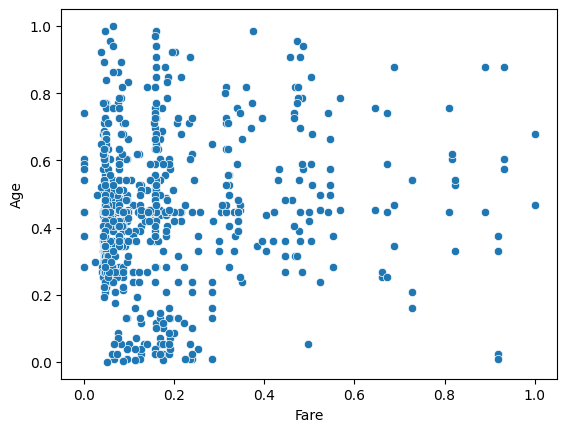

In [ ]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_var = df[['Fare', 'Age']]
z_scores = np.abs(stats.zscore(df_var))
threshold = 3
df_var = df_var[(z_scores < threshold).all(axis=1)]
df_var = scaler.fit_transform(df_var)
df_var = pd.DataFrame(df_var, columns=['Fare', 'Age'])
sns.scatterplot(x='Fare', y='Age', data=df_var)

Calculating and analyzing variance. We can see that both numerical features display low variance and we can decide based on these values which features we want to proceed with

In [ ]:
df_var.var(axis=0)

Fare    0.031801
Age     0.036275
dtype: float64

###Wrapper Methods

In filter methods we saw how we decided which features to keep based on calculations we performed and the answers we recieved from those calculations. Wrapper methods take a more trial and error aproach where multiple combinations are tried and compared and the model with the highest hits is selected. Since wrapper methods utilize results and relations observed after trials, we see less requirements for our data where we do not have to drop features just because they are categorical or numerical.

####1) Forward Selection



We start with a few, usually 1, features and increment features gradually.

In [ ]:
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Survived']), df['Survived'], test_size=0.3, random_state=42)

We are using a RandomForestClassifier (RFC) which is a decision tree method used for classification problems. RFC works by generating trees with random combinations to see which gets the most hits.
* n_jobs=-1 means we want to use all our cores
* k_features=(1,9) means our model will try all combinations for all features
* forward=True means we are incrementing features
* floating=True means our model can also check after every feature addition if removing a previously added feature improves performance and accuracy
* verbose=2 means we want a really detailed output of every stage
* scoring=accuracy means we use accuracy score to judge importance and decide
* cv=5 means 5-fold cross validation

In [ ]:
sfs = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),k_features=(1,9),forward=True,floating=True,verbose=2,scoring="accuracy",cv=5).fit(X_train, y_train)


[2024-07-18 04:37:50] Features: 1/9 -- score: 0.7849548387096774
[2024-07-18 04:38:01] Features: 2/9 -- score: 0.7946064516129033
[2024-07-18 04:38:14] Features: 3/9 -- score: 0.8138580645161291
[2024-07-18 04:38:28] Features: 4/9 -- score: 0.820258064516129
[2024-07-18 04:38:41] Features: 5/9 -- score: 0.8075096774193549
[2024-07-18 04:38:55] Features: 6/9 -- score: 0.8058322580645163
[2024-07-18 04:39:09] Features: 7/9 -- score: 0.8058451612903227
[2024-07-18 04:39:23] Features: 8/9 -- score: 0.8026838709677421
[2024-07-18 04:39:36] Features: 9/9 -- score: 0.7914322580645161

In [ ]:
sfs.k_feature_idx_

(0, 1, 5, 7)

In [ ]:
sfs.k_feature_names_

('Pclass', 'Sex', 'Fare', 'Q')

In [ ]:
sfs.k_score_

0.820258064516129

In [ ]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.736, 0.88, 0.712, 0.782258064516129, 0.8145...",0.784955,"(Sex,)",0.076329,0.059386,0.029693
2,"(1, 5)","[0.744, 0.856, 0.744, 0.8064516129032258, 0.82...",0.794606,"(Sex, Fare)",0.056943,0.044304,0.022152
3,"(1, 5, 7)","[0.8, 0.856, 0.752, 0.8064516129032258, 0.8548...",0.813858,"(Sex, Fare, Q)",0.049874,0.038804,0.019402
4,"(0, 1, 5, 7)","[0.816, 0.84, 0.784, 0.8145161290322581, 0.846...",0.820258,"(Pclass, Sex, Fare, Q)",0.028501,0.022175,0.011087
5,"(0, 1, 5, 6, 7)","[0.752, 0.816, 0.776, 0.8306451612903226, 0.86...",0.80751,"(Pclass, Sex, Fare, C, Q)",0.050602,0.03937,0.019685
6,"(0, 1, 4, 5, 6, 7)","[0.784, 0.816, 0.784, 0.8064516129032258, 0.83...",0.805832,"(Pclass, Sex, Parch, Fare, C, Q)",0.026578,0.020678,0.010339
7,"(0, 1, 2, 4, 5, 6, 7)","[0.808, 0.8, 0.768, 0.8225806451612904, 0.8306...",0.805845,"(Pclass, Sex, Age, Parch, Fare, C, Q)",0.02796,0.021754,0.010877
8,"(0, 1, 2, 4, 5, 6, 7, 8)","[0.784, 0.8, 0.752, 0.8145161290322581, 0.8629...",0.802684,"(Pclass, Sex, Age, Parch, Fare, C, Q, S)",0.04702,0.036583,0.018291
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)","[0.792, 0.76, 0.76, 0.8145161290322581, 0.8306...",0.791432,"(Pclass, Sex, Age, SibSp, Parch, Fare, C, Q, S)",0.036566,0.028449,0.014225


####2) Backward Elimination



Opposite of forward selection

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df.drop(columns=['Survived']), df['Survived'], test_size=0.3, random_state=42)

Main documentation and argument details are same as forward selection but notice how setting floating=false reduces computation complexity but also gives a lesser accuracy score.

In [ ]:
sfsb = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),k_features=(1,9),forward=False,floating=False,verbose=2,scoring="accuracy",cv=5).fit(X_train2, y_train2)


[2024-07-18 04:44:18] Features: 8/1 -- score: 0.7978580645161292
[2024-07-18 04:44:30] Features: 7/1 -- score: 0.8074580645161291
[2024-07-18 04:44:42] Features: 6/1 -- score: 0.8170322580645161
[2024-07-18 04:44:51] Features: 5/1 -- score: 0.8106580645161291
[2024-07-18 04:44:58] Features: 4/1 -- score: 0.817083870967742
[2024-07-18 04:45:04] Features: 3/1 -- score: 0.8170967741935484
[2024-07-18 04:45:08] Features: 2/1 -- score: 0.7945806451612903
[2024-07-18 04:45:11] Features: 1/1 -- score: 0.7849548387096774

In [ ]:
sfsb.k_feature_idx_

(1, 5, 7)

In [ ]:
sfsb.k_feature_names_

('Sex', 'Fare', 'Q')

In [ ]:
sfsb.k_score_

0.8170967741935484

In [ ]:
pd.DataFrame.from_dict(sfsb.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)","[0.792, 0.752, 0.768, 0.8306451612903226, 0.83...",0.794658,"(Pclass, Sex, Age, SibSp, Parch, Fare, C, Q, S)",0.04116,0.032024,0.016012
8,"(0, 1, 2, 4, 5, 6, 7, 8)","[0.784, 0.784, 0.76, 0.8064516129032258, 0.854...",0.797858,"(Pclass, Sex, Age, Parch, Fare, C, Q, S)",0.041201,0.032056,0.016028
7,"(0, 1, 2, 4, 5, 6, 7)","[0.792, 0.816, 0.768, 0.7983870967741935, 0.86...",0.807458,"(Pclass, Sex, Age, Parch, Fare, C, Q)",0.040747,0.031703,0.015851
6,"(0, 1, 2, 4, 5, 7)","[0.84, 0.816, 0.784, 0.8064516129032258, 0.838...",0.817032,"(Pclass, Sex, Age, Parch, Fare, Q)",0.02697,0.020984,0.010492
5,"(0, 1, 4, 5, 7)","[0.808, 0.816, 0.768, 0.8306451612903226, 0.83...",0.810658,"(Pclass, Sex, Parch, Fare, Q)",0.029614,0.02304,0.01152
4,"(0, 1, 5, 7)","[0.808, 0.816, 0.784, 0.8225806451612904, 0.85...",0.817084,"(Pclass, Sex, Fare, Q)",0.029499,0.022952,0.011476
3,"(1, 5, 7)","[0.808, 0.84, 0.752, 0.8306451612903226, 0.854...",0.817097,"(Sex, Fare, Q)",0.046174,0.035925,0.017962
2,"(1, 5)","[0.784, 0.832, 0.744, 0.7983870967741935, 0.81...",0.794581,"(Sex, Fare)",0.038484,0.029942,0.014971
1,"(1,)","[0.736, 0.88, 0.712, 0.782258064516129, 0.8145...",0.784955,"(Sex,)",0.076329,0.059386,0.029693


####3) Recursive Feature Elimination (RFE)



Eliminate least important feature after every recursion and calculate importance based on the model provided

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
X_trainrfe, X_testrfe, y_trainrfe, y_testrfe = train_test_split(df.drop(columns=['Survived']), df['Survived'], test_size=0.3, random_state=42)

In [ ]:
rfe = RFE(RandomForestClassifier(n_jobs=-1), n_features_to_select=5).fit(X_trainrfe, y_trainrfe)

In [ ]:
x = rfe.support_
selected_features = X_trainrfe.columns[x]  # Get column names where support is True
print(selected_features)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Fare'], dtype='object')


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = rfe.predict(X_testrfe)

# Calculating accuracy
accuracy = accuracy_score(y_testrfe, y_pred)
print("Test set accuracy:", accuracy)

Test set accuracy: 0.8022388059701493


##Feature Extraction

Feature Extraction refers to extracting new features using relations between two or more existing features in the dataset. It is especially useful when trying to reduce dimensionality of a dataset (higher the number of features, higher the dimensionality). One method for feature extraction is PCA (Principal Component Analysis).
PCA captures linear relations between two features so it is important that the features have a linear relationship and have no outliers, so we will borrow data from variance threshold method

In [ ]:
from scipy import stats
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_pca = df[['Fare', 'Age']]
df_pca_scaled = scaler.fit_transform(df_pca)
df_pca = pd.DataFrame(df_pca_scaled, columns=df_pca.columns)
df_pca.describe()

,Fare,Age
count,8.910000e+02,8.910000e+02
mean,3.987333e-18,2.232906e-16
std,1.000562e+00,1.000562e+00
min,-6.484217e-01,-2.253155e+00
25%,-4.891482e-01,-5.924806e-01
50%,-3.573909e-01,0.000000e+00
75%,-2.424635e-02,4.079260e-01
max,9.667167e+00,3.870872e+00


After performing pca where pca(0.95) means we want to retain 95% of the original data and relationship and trends from our dataset, we see that we still end up with 2 columns and that is because fare and age are not so linear which we saw in the correlation coefficient in filter method.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
df_pca = pca.fit_transform(df_pca)
df_pca.shape

(891, 2)